In [4]:
import numpy as np
from scipy.integrate import odeint
from icecream import ic
import matplotlib.pyplot as plt

from typing import Optional
from typing import Union
from typing import List
from typing import Tuple


def build_hamiltonian(
        time: float,
        energy: float,
        omega: float,
        g_1: float,
        g_2: float,
) -> np.ndarray:
    h_0 = energy + 1 + g_1 / g_2 * np.cos(omega * time)
    h_1 = 1 + g_1 / g_2 * np.cos(omega * time)
    return np.array([
        [   0,   0,  h_1],
        [   0,   0, -h_0],
        [ h_1, h_0,    0]],
    )


def system(
        X: np.ndarray,
        time: float,
        energy: float,
        omega: float,
        g_1: float,
        g_2: float,
) -> np.ndarray:
    return np.matmul(
        build_hamiltonian(
            time,
            energy,
            omega,
            g_1,
            g_2
        ),
        X
    )


def plot_poincare_disk(
        ax: plt.Axes,
        k_0: np.ndarray,
        k_1: np.ndarray,
        k_2: np.ndarray,
) -> plt.Axes:
    tan_theta = - k_2 / k_1
    theta = np.arctan(tan_theta)

    k2 = k_1 * k_1 + k_2 * k_2
    k = np.sqrt(k2)
    mask = np.isclose(k, 0)
    umask = np.logical_not(mask)
    z_mag = np.zeros_like(k)
    z_mag[mask] = k[mask] - (k * k2)[mask] + 2 * (k * k2 ** 2)[mask]
    z_mag[umask] = (-1 + np.sqrt(1 + 4 * k2[umask])) / (2 * k[umask])
    ax.scatter(
        z_mag * np.cos(theta),
        z_mag * np.sin(theta),
    )
    return ax


def solve_system(
        energys: Union[float, List[float], np.ndarray],
        laser_frequency: float,
        stop_time: float,
        coupling_1: float,
        coupling_2: float,
        initial_conditions: np.ndarray,
        start_time: Optional[float] = None,
) -> np.ndarray:

    omega = laser_frequency
    time_step = 1 / (20 * omega)
    if start_time is None:
        start_time = 0
    time_steps = np.arange(start_time, stop_time, time_step)

    if isinstance(energys, list) or isinstance(energys, np.ndarray):
        solns = [
            odeint(
                system,
                initial_conditions,
                time_steps,
                args=(
                    energy,
                    omega,
                    coupling_1,
                    coupling_2
                ),
                full_output=False,
            )
            for energy in energys
        ]
    else:
        solns = odeint(
            system,
            initial_conditions,
            time_steps,
            args=(
                energys,
                omega,
                coupling_1,
                coupling_2
            ),
            full_output=False,
        )

    return np.array(solns)


C:\Users\xzono\AppData\Local\Temp\ipykernel_22368\623677791.py:54: RuntimeWarning: invalid value encountered in divide
  tan_theta = - k_2 / k_1


<Axes: >

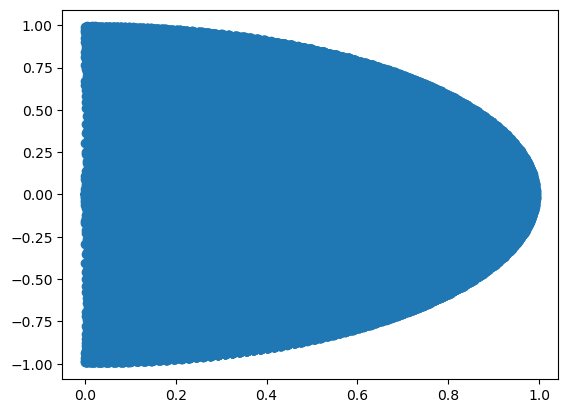

In [26]:
fig, ax = plt.subplots()

sol = solve_system(1000, 1000, 1, 1,0.1, [1,0,0])
plot_poincare_disk(ax, sol[:,0],sol[:,1],sol[:,2])